In [222]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime 
%matplotlib inline

In [223]:
data = pd.read_csv('day.csv')

In [224]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [225]:
# Check for missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# Data Exploration

In [226]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [228]:
# From above we find the minimum value windspeed and humidity are 0, but it is not realistic
# so we choose to delete rows that with windspeed and humidity equal to 0
data = data[(data.windspeed > 0) & (data.hum > 0)]
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.406849,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,0.495530,0.474475,0.628754,0.190388,849.275342,3660.390411,4509.665753
std,211.023699,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,0.183134,0.163040,0.140614,0.077506,686.449738,1557.149836,1933.194931
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,548.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730313,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [229]:
# Calculate the correlation 
corr = data.corr()
corr

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.410693,0.865864,0.495761,0.015835,0.000950,-0.003031,-0.015912,0.149698,0.151825,0.007987,-0.111058,0.273629,0.658468,0.627545
season,0.410693,1.000000,-0.003701,0.831183,-0.010868,-0.002159,0.013762,0.024832,0.333735,0.342366,0.200230,-0.227760,0.208695,0.409580,0.404013
yr,0.865864,-0.003701,1.000000,-0.003197,0.007724,-0.004778,-0.001081,-0.044983,0.046850,0.045400,-0.118371,-0.010566,0.247343,0.593533,0.565907
mnth,0.495761,0.831183,-0.003197,1.000000,0.018964,0.010218,-0.004956,0.047967,0.219601,0.226905,0.219132,-0.206481,0.121572,0.291715,0.278139
holiday,0.015835,-0.010868,0.007724,0.018964,1.000000,-0.101862,-0.252948,-0.034137,-0.028700,-0.032642,-0.017208,0.006513,0.054050,-0.109505,-0.069012
weekday,0.000950,-0.002159,-0.004778,0.010218,-0.101862,1.000000,0.035341,0.029246,0.000229,-0.007166,-0.049885,0.013660,0.060792,0.058889,0.069020
workingday,-0.003031,0.013762,-0.001081,-0.004956,-0.252948,0.035341,1.000000,0.058826,0.053230,0.052717,0.028830,-0.019672,-0.517604,0.306663,0.063217
weathersit,-0.015912,0.024832,-0.044983,0.047967,-0.034137,0.029246,0.058826,1.000000,-0.118994,-0.120126,0.620839,0.036026,-0.244319,-0.254611,-0.291838
temp,0.149698,0.333735,0.046850,0.219601,-0.028700,0.000229,0.053230,-0.118994,1.000000,0.991699,0.125160,-0.157338,0.542988,0.540009,0.627774
atemp,0.151825,0.342366,0.045400,0.226905,-0.032642,-0.007166,0.052717,-0.120126,0.991699,1.000000,0.138585,-0.183099,0.543611,0.544285,0.631439


Text(0.5,1,'Correlation Plot')

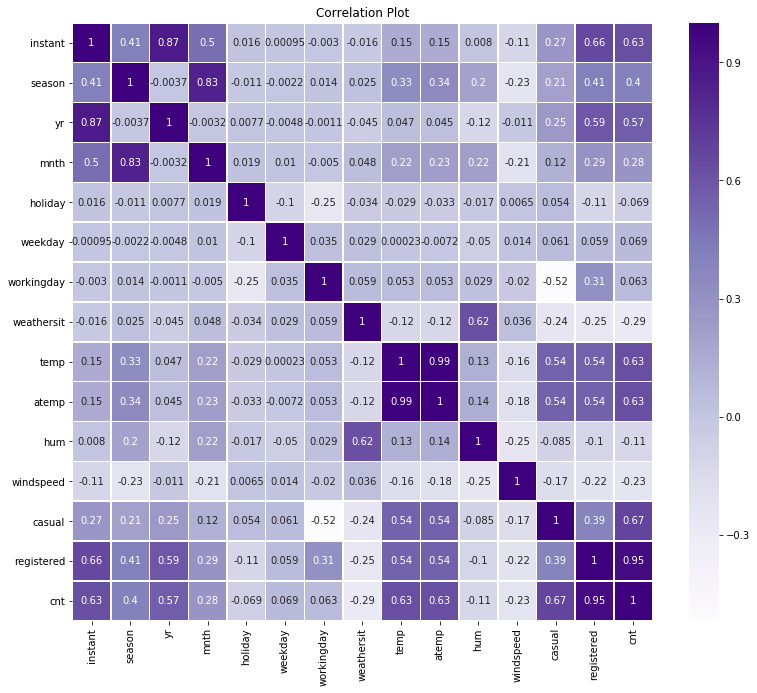

In [230]:
# Correlation plot
fig = plt.figure(figsize=(13,11))
correlation = sns.heatmap(corr, cmap = 'Purples', linewidth = 0.5, annot = True)
correlation.set_title("Correlation Plot") 

In [12]:
# We list some questions that we would like to explore
# 1. The difference between 2011 and 2012?
# 2. The difference between months? season? 
# 3. How do weather, windspeed, temp and humidity influence demand?
# 4. How holiday and workingday influence?



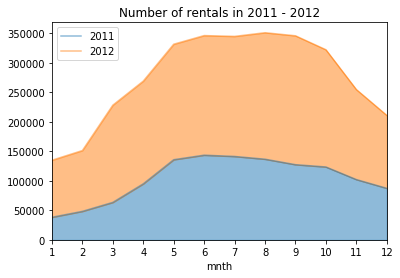

In [403]:
# The difference between 2011 and 2012?
ax1 = plt.subplot(111)
df1 = data.groupby(['mnth','yr']).sum().unstack()['cnt']
df1.plot(kind = 'area',alpha = 0.5, ax = ax1)
ax1.set_xticks(list(range(13)))
ax1.set_xlim(1,12)
ax1.set_title('Number of rentals in 2011 - 2012')
plt.legend(['2011','2012'])
plt.show()
# in 2012, the demand is much higher than 2011

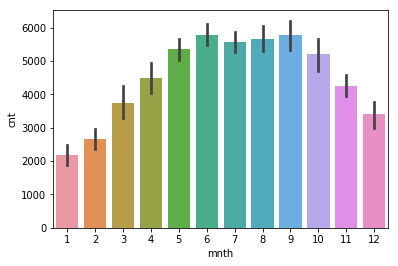

In [271]:
# The difference between months? season? 
# month

sns.barplot(x = 'mnth', y = 'cnt', data = data)

([<matplotlib.axis.XTick at 0x1c3092fa50>,
 <a list of 12 Text xticklabel objects>)

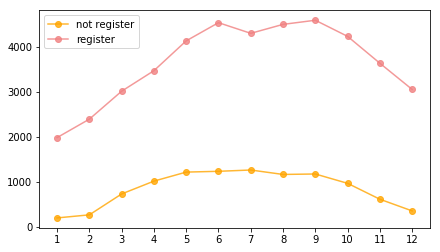

In [401]:
# The difference between casual\registered user?
fig = plt.figure(figsize = (7,4))
mnth_casual = data.groupby('mnth')['casual'].mean()
mnth_registered = data.groupby('mnth')['registered'].mean()
plt.plot(mnth_casual.index, mnth_casual.values, '-o',color = 'orange', label='not register', alpha = 0.8)
plt.plot(mnth_registered.index, mnth_registered.values,'-o', color = 'lightcoral', label='register', alpha = 0.8)
plt.legend()
plt.xticks(mnth_casual.index)

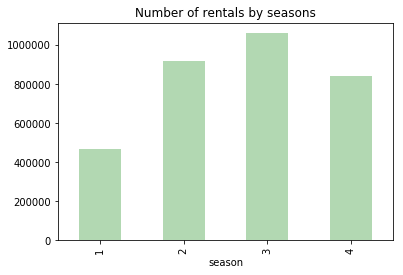

In [264]:
#season
ax3 = plt.subplot(111)
df3 = data.groupby('season')['cnt'].sum()
df3.plot(kind = 'bar',alpha = 0.3, ax = ax3, color = 'g')
ax3.set_title('Number of rentals by seasons')
plt.show()

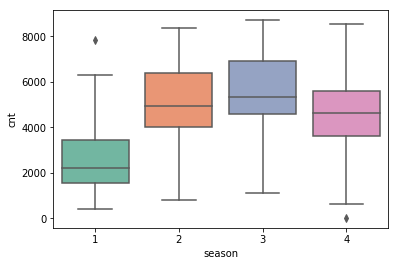

In [284]:
sns.boxplot(x="season",y="cnt",data=data,palette="Set2")

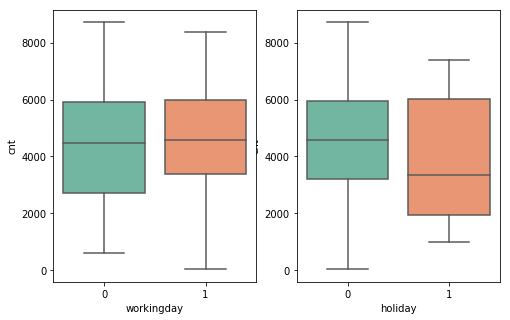

In [389]:
# How holiday and workingday influence?
# holiday
fig = plt.figure(figsize = (8,5))
plt.subplot(1,2,2)
sns.boxplot(x="holiday",y="cnt",data=data,palette="Set2")
plt.subplot(1,2,1)
# working day
sns.boxplot(x="workingday",y="cnt",data=data,palette="Set2")

[None]

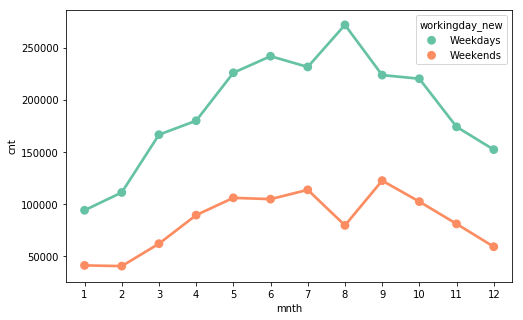

In [275]:
# How the rental changes in working days interms of hours?
fig = plt.subplots(figsize = (8,5))
ax6 = plt.subplot(111)
pd.set_option('mode.chained_assignment', None)
working_dic = {1:'Weekdays', 0:'Weekends'}
data['workingday_new'] = data['workingday'].map(working_dic)
df6 = pd.DataFrame(data.groupby(['mnth','workingday_new'])['cnt'].sum()).reset_index()
sns.pointplot(x = df6['mnth'], y = df6['cnt'], hue = df6['workingday_new'], data = df6, join = True, palette="Set2")
ax6.set(label = 'big')


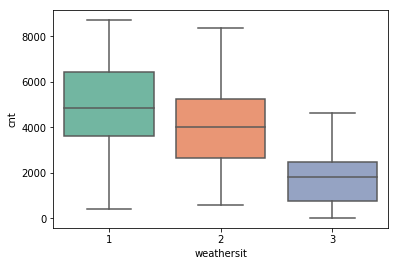

In [277]:
# How do weather, windspeed, temp and humidity influence demand?
sns.boxplot(x="weathersit",y="cnt",data=data,palette="Set2")

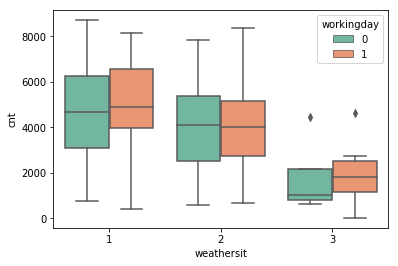

In [278]:
sns.boxplot(x="weathersit",y="cnt",data=data,palette="Set2", hue = "workingday")

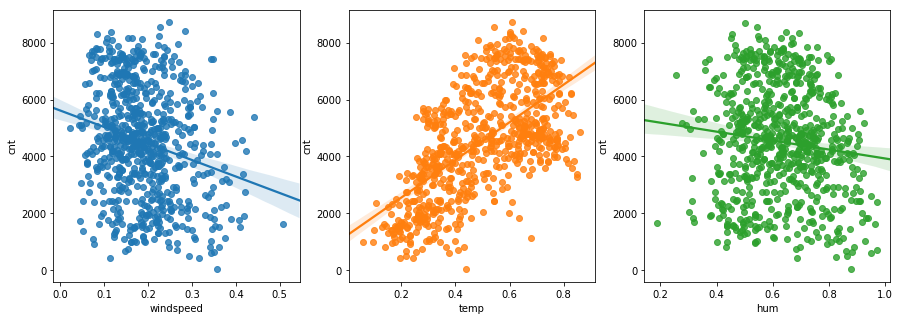

In [287]:
# windspeed, temp and humidity
fig,(ax7,ax8,ax9) = plt.subplots(ncols =3, figsize = (15,5))
sns.regplot(x="windspeed",y="cnt",data=data, ax = ax7,fit_reg=True)
sns.regplot(x="temp",y="cnt",data=data, ax = ax8,fit_reg=True)
sns.regplot(x="hum",y="cnt",data=data, ax = ax9,fit_reg=True)

# Data Preprocessing

In [288]:
# Define variables
categoricalFeature = ['season','mnth','weathersit','weekday']
numericalFeature = ['temp','atemp','hum','windspeed']



In [289]:
# Get dummy variables
dummies =[]
for i in range(0,4):
    a = pd.get_dummies(data[categoricalFeature].iloc[:,i],
                                       prefix = data[categoricalFeature].columns[i])
    dummies.append(a)
    


df1_cat = pd.concat(dummies, axis = 1,ignore_index = False)
df1_cat = pd.DataFrame(df1_cat)
df1_cat


,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
727,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
728,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
729,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [290]:
# Standardized numerical variables
from sklearn import preprocessing 
df1 = data[numericalFeature]
df1_rescale = ((df1 - df1.mean())/df1.std())
df1_num = df1_rescale
df1_num.head()

,temp,atemp,hum,windspeed
0,-0.826517,-0.679898,1.259325,-0.386325
1,-0.721069,-0.740534,0.478848,0.750273
2,-1.633592,-1.748472,-1.361750,0.747306
3,-1.613737,-1.609138,-0.272513,-0.388260
4,-1.466539,-1.503961,-1.363997,-0.045008


In [291]:
# Concate dummies and numerical variables to get X
X_rescale = pd.concat([df1_num,df1_cat,data["holiday"],data["workingday"]], axis = 1, ignore_index=False)
X_rescale.head()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,...,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday,workingday
0,-0.826517,-0.679898,1.259325,-0.386325,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.721069,-0.740534,0.478848,0.750273,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,-1.633592,-1.748472,-1.361750,0.747306,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,-1.613737,-1.609138,-0.272513,-0.388260,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-1.466539,-1.503961,-1.363997,-0.045008,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [374]:
# define response variable
y = data["cnt"]

y_rescale = y - y.mean()
y_rescale

0     -3524.665753
1     -3708.665753
2     -3160.665753
3     -2947.665753
4     -2909.665753
          ...     
726   -2395.665753
727   -1414.665753
728   -3168.665753
729   -2713.665753
730   -1780.665753
Name: cnt, Length: 730, dtype: float64

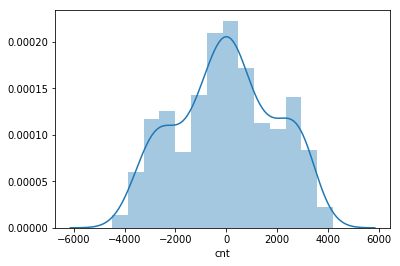

In [293]:
sns.distplot(y_rescale)

# Model Building

In [296]:
from sklearn.metrics import r2_score  
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,RidgeCV

In [375]:
# Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rescale, y, test_size=0.2,random_state = 0)

## Linear regression

In [351]:
lr=LinearRegression()

lr.fit(X_train,y_train)


y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)


#RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Train Set RMSE:",rmse_train)
print("Test Set RMSE:",rmse_test)

Train Set RMSE: 1213.7000953593797
Test Set RMSE: 1364.1392674348772


In [352]:
#r2_score
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print("Train Set r2_score:",r2_score_train)
print("Test Set r2_score:",r2_score_test)

Train Set r2_score: 0.589997596447317
Test Set r2_score: 0.5651148998071893


## Ridge Regression

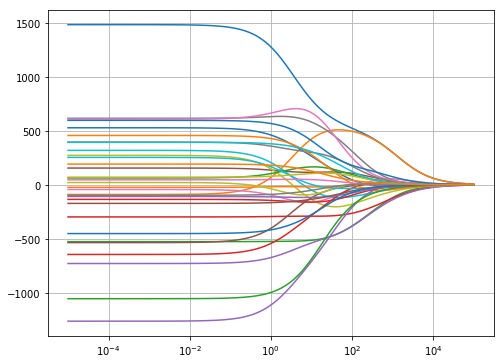

In [354]:
alphas = 10**np.linspace(-5,5,100)

betas = []
for alpha in alphas:
    rd = Ridge(alpha = alpha)
    rd.fit(X_train, y_train)
    betas.append(rd.coef_)
# Plot
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)

plt.xscale("log")
plt.grid(True)
plt.axis("tight")
plt.show()

In [356]:
# Ridge

ridge=RidgeCV(alphas=alphas,store_cv_values=True)


ridge.fit(X_train,y_train)

# Optimal alpha through cross validation
alpha=ridge.alpha_
print("Optimal alpha:",alpha)

# Train Set
y_train_pred=ridge.predict(X_train)
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))

# Test Set
y_test_pred = ridge.predict(X_test)
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

print("Train Set RMSE:",rmse_train)
print("Test Set RMSE:",rmse_test)

r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print("Train Set r2_score:",r2_score_train)
print("Test Set r2_score:",r2_score_test)

Optimal alpha: 9.111627561154886
Train Set RMSE: 1222.6771139587615
Test Set RMSE: 1334.9274438371338
Train Set r2_score: 0.5839100780899935
Test Set r2_score: 0.583540828903796


## Lasso Regression

/Users/changgeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Optimal Alpha: 7.78708423240569
Lasso model has 24features，and eliminates 8features


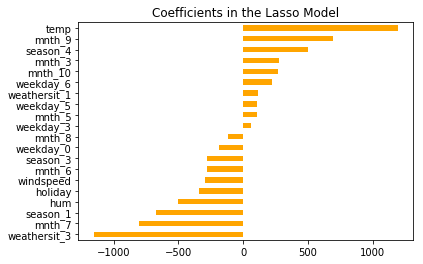

Train Set RMSE: 1222.1449828365621
Test Set RMSE: 1333.9213960792595
Train Set r2_scor: 0.5842721789468526
Test Set r2_socre: 0.5841683086056075


In [361]:
lasso=LassoCV()

lasso.fit(X_train,y_train)

alpha=lasso.alpha_
print("Optimal Alpha:",alpha)


coefs=pd.Series(lasso.coef_,index=X_train.columns)
print("Lasso model has "+str(sum(coefs!=0))+"features，and eliminates",str(sum(coefs==0))+"features")
# Top 10 and Last 10
imp_coefs=pd.concat([coefs.sort_values().head(10),coefs.sort_values().tail(10)])
imp_coefs.plot(kind="barh", color = 'orange')
plt.title("Coefficients in the Lasso Model")
plt.show()

y_train_pred=lasso.predict(X_train)
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
print("Train Set RMSE:",rmse_train)

y_test_pred = lasso.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Test Set RMSE:",rmse_test)

r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print("Train Set r2_scor:",r2_score_train)
print("Test Set r2_socre:",r2_score_test)

## Result

In [ ]:
# Lasso has better RMSE and R^2

In [378]:
y_test_pred = lasso.predict(X_test)

y_test = y_test + y.mean()

y_test_pred = y_test_pred + y.mean()

In [379]:
result = pd.DataFrame({"y_test":y_test,'y_test_predict':y_test_pred})
result

,y_test,y_test_predict
197,9811.665753,9296.194813
188,8549.665753,8930.029913
14,5757.665753,7398.082261
31,5869.665753,6080.653943
391,7965.665753,7022.036451
...,...,...
119,9821.665753,9510.488423
567,8968.665753,6770.484327
689,10143.665753,8893.155039
267,9519.665753,10737.395951
